In [1]:
!python --version


Python 3.9.18


In [2]:
%%sh
wget https://bit.ly/jb-housing -O housing.zip
unzip -o housing.zip

--2023-11-07 10:08:41--  https://bit.ly/jb-housing
bit.ly (bit.ly) 해석 중... 67.199.248.10, 67.199.248.11
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.10|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://drive.google.com/uc?id=1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk&export=download [따라감]
--2023-11-07 10:08:41--  https://drive.google.com/uc?id=1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk&export=download
drive.google.com (drive.google.com) 해석 중... 172.217.25.14, 2404:6800:4005:80f::200e


다음으로 연결 중: drive.google.com (drive.google.com)|172.217.25.14|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3l2dq79qt5sa24s0gugm1hs0siesm6p/1699319250000/05323453685652752123/*/1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk?e=download&uuid=cc9c8f94-c671-4f89-a81b-216642dae6a9 [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2023-11-07 10:08:42--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g3l2dq79qt5sa24s0gugm1hs0siesm6p/1699319250000/05323453685652752123/*/1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk?e=download&uuid=cc9c8f94-c671-4f89-a81b-216642dae6a9
doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com) 해석 중... 172.217.24.225, 2404:6800:4005:80c::2001
다음으로 연결 중: doc-10-5o-docs.googleusercontent.com (doc-10-5o-docs.googleusercontent.com)|172.217.24.225|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 409382 (400K) [application/zip]
저

Archive:  housing.zip
  inflating: housing.csv             


In [3]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,
random_state=len(housing),
shuffle=True)
len(train_set), len(test_set)

(16512, 4128)

<Axes: >

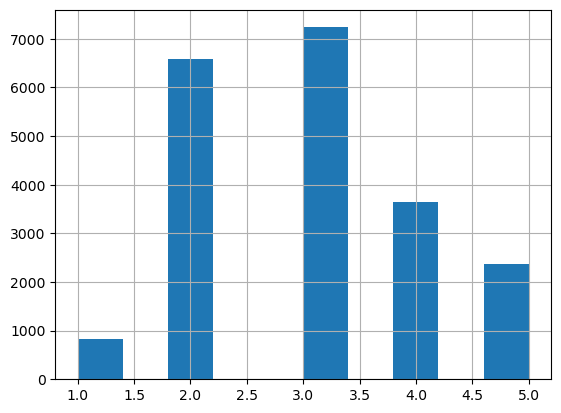

In [5]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=len(housing))

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
print(proportions)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [7]:
proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
print(proportions)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


<Axes: >

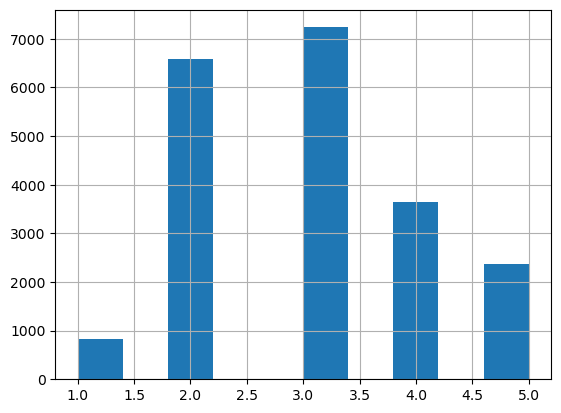

In [8]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

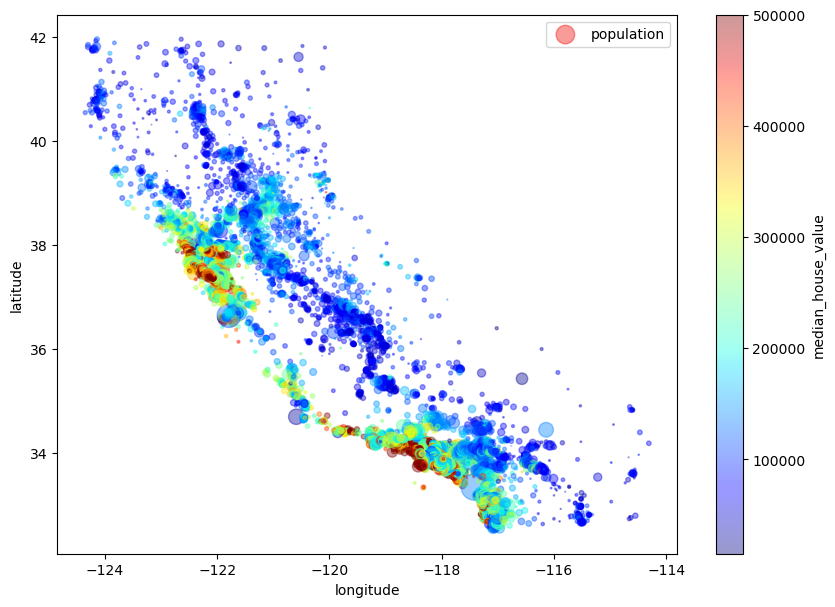

In [9]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

--2023-11-07 10:08:47--  https://bit.ly/jb-california_map
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/USA_California_location_map.svg/400px-USA_California_location_map.svg.png [따라감]
--2023-11-07 10:08:47--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/USA_California_location_map.svg/400px-USA_California_location_map.svg.png
upload.wikimedia.org (upload.wikimedia.org) 해석 중... 103.102.166.240, 2001:df2:e500:ed1a::2:b
다음으로 연결 중: upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 58129 (57K) [image/png]
저장 위치: `california.png'

california.png      100%[===================>]  56.77K   329KB/s    / 0.2s     

2023-11-07 10:08:48 (329 KB/s) - `california.png' 저장함 [58129/58129]



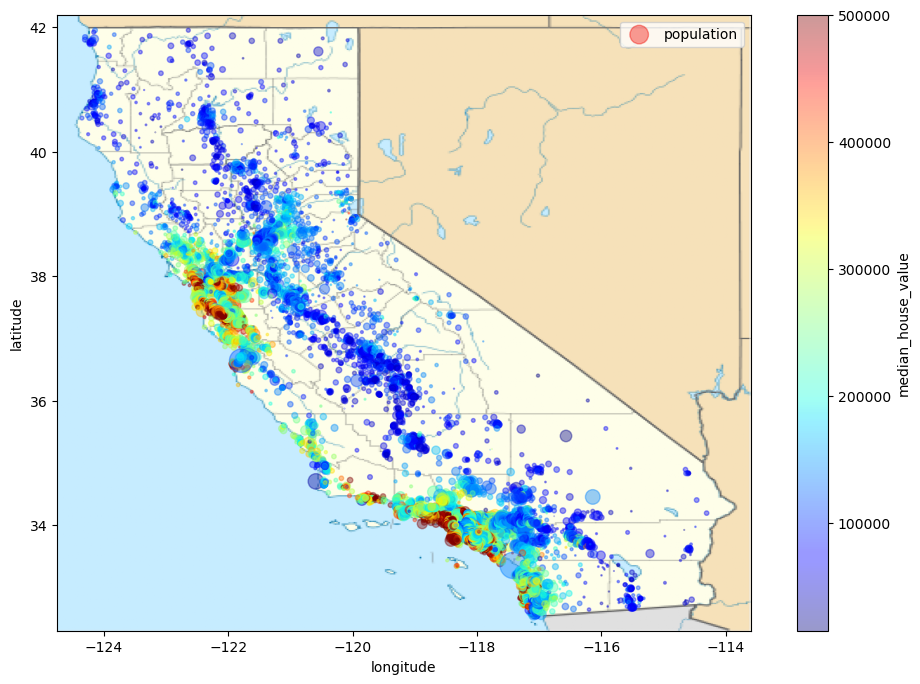

In [10]:
!wget https://bit.ly/jb-california_map -O california.png
california_img = plt.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(12,8),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
ax.imshow(california_img, extent=[-124.75, -113.6, 32.3, 42.2])
plt.legend()

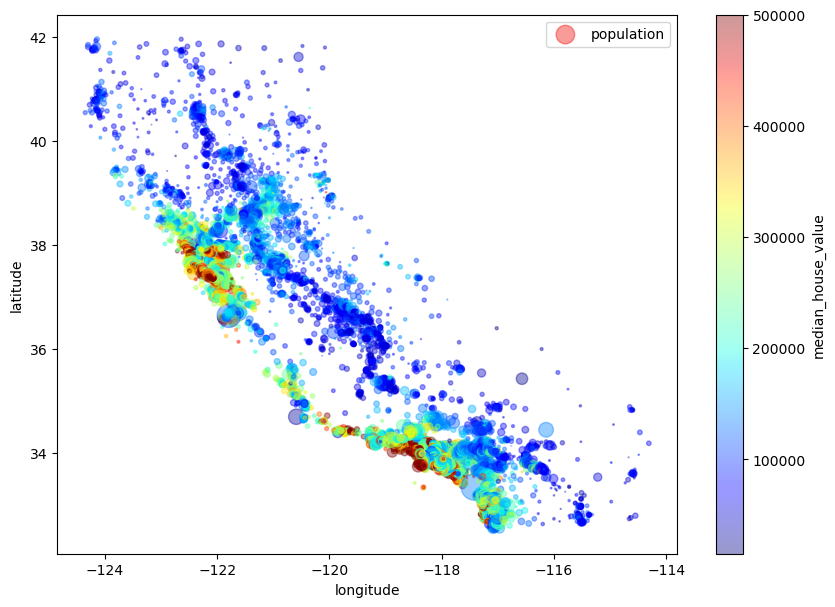

In [11]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
              s= housing["population"]/100, label="population", figsize=(10,7),
              c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

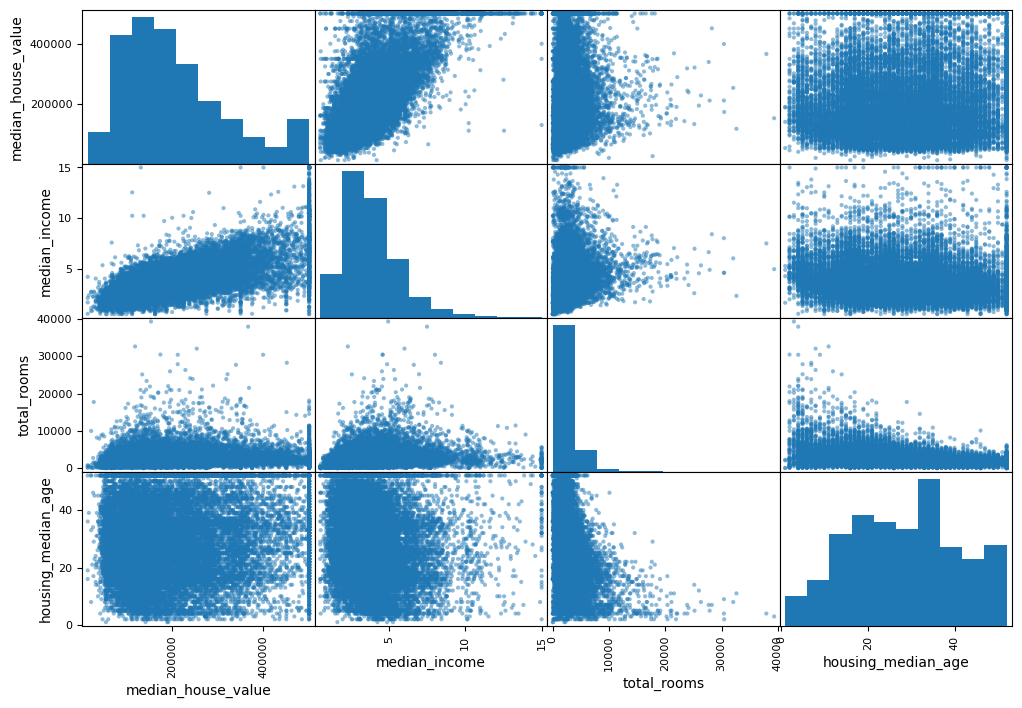

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income",
"total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

ValueError: could not convert string to float: 'NEAR BAY'

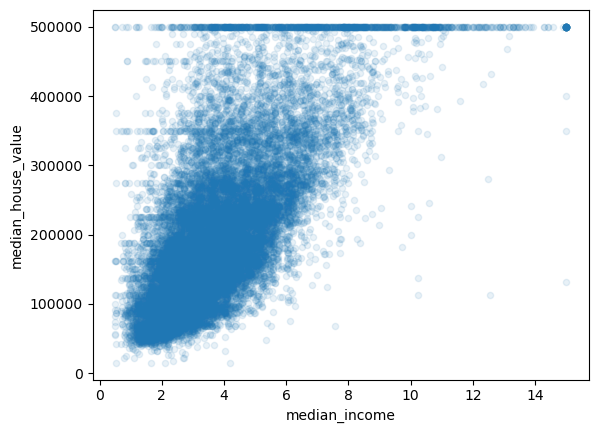

In [13]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"]=housing["population"] / housing["households"]


corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"]=housing["population"] / housing["households"]


corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'NEAR BAY'

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# option 1
housing.dropna(subset=["total_bedrooms"])
# option 2
housing.drop("total_bedrooms", axis=1)
# option 3
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
%%sh
wget https://bit.ly/jb-housing -O housing.zip
unzip -o housing.zip

--2023-11-06 14:07:33--  https://bit.ly/jb-housing
bit.ly (bit.ly) 해석 중... 67.199.248.10, 67.199.248.11
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.10|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://drive.google.com/uc?id=1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk&export=download [따라감]
--2023-11-06 14:07:33--  https://drive.google.com/uc?id=1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk&export=download
drive.google.com (drive.google.com) 해석 중... 172.217.24.110, 2404:6800:4005:811::200e
다음으로 연결 중: drive.google.com (drive.google.com)|172.217.24.110|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i5eojpqjpq044rj4t3ivs75p6llr383c/1699247250000/05323453685652752123/*/1Tuc9glbWr30PUJ-yqFqcaFxkTIDjeguk?e=download&uuid=8b7fac2b-cb3f-4c6d-aa32-f04a3d03ec19 [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2023-11-06 14:07:36--  https://doc-10-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcu

Archive:  housing.zip
  inflating: housing.csv             


In [ ]:
import pandas as pd
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

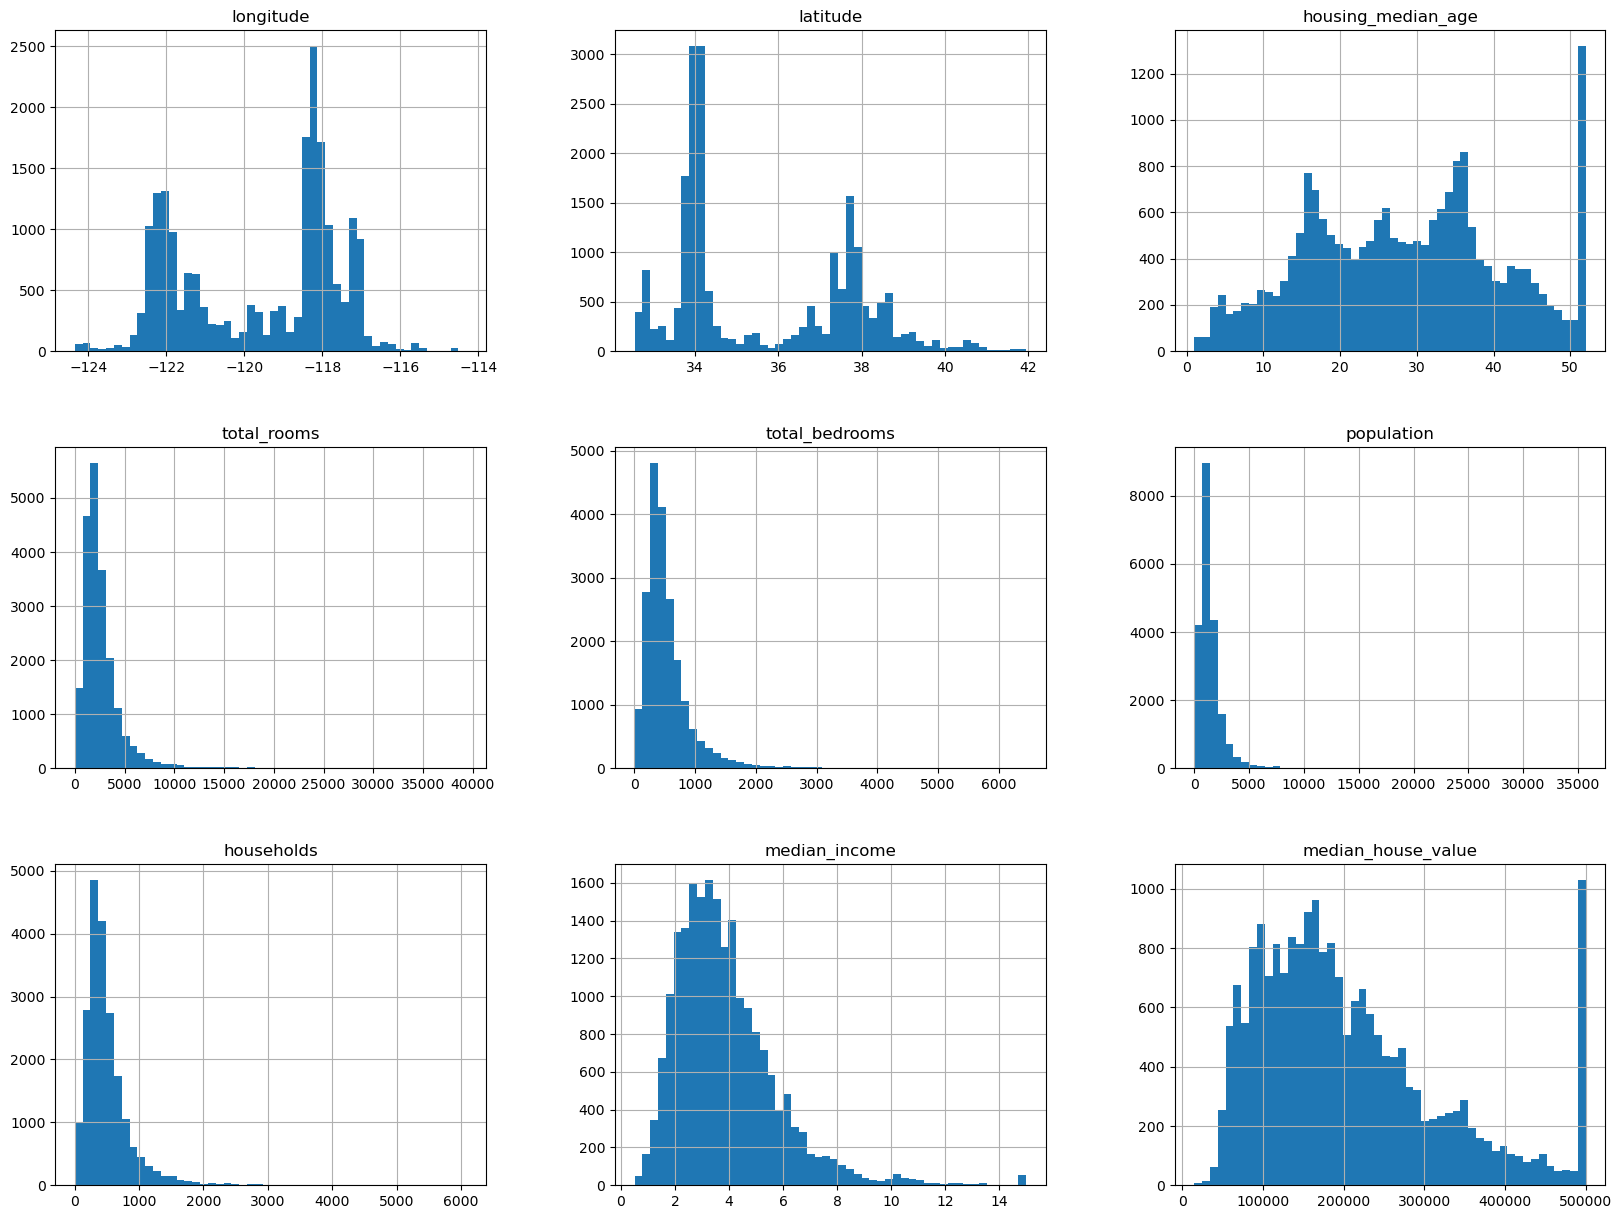

In [ ]:
housing.hist(bins=50, figsize=(20,15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,
random_state=len(housing),
shuffle=True)
len(train_set), len(test_set)

(16512, 4128)

<Axes: >

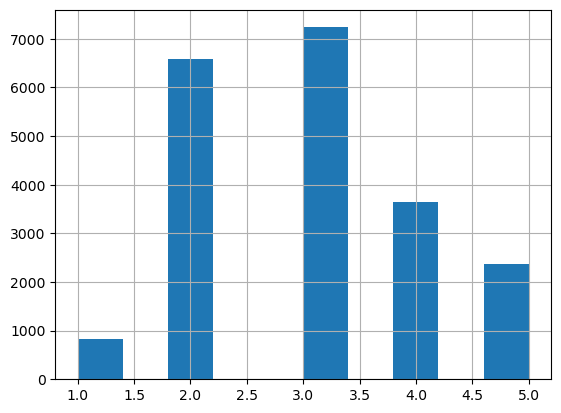

In [ ]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=len(housing))

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

proportions = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
print(proportions)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


<Axes: xlabel='longitude', ylabel='latitude'>

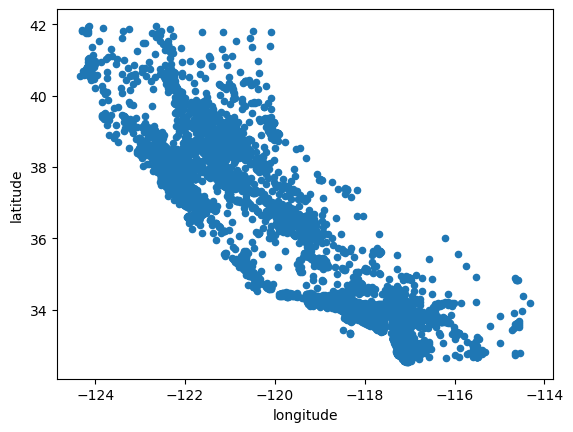

In [ ]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: '<1H OCEAN'

In [ ]:

# "ocean_proximity" 열을 원핫 인코딩
housing = pd.get_dummies(housing, columns=["ocean_proximity"])

housing["median_house_value"] = housing["median_house_value"].astype(float)

# 상관 행렬 계산
corr_matrix = housing.corr()

# "median_house_value"와 다른 열들 간의 상관 관계 출력
correlations = corr_matrix["median_house_value"].sort_values(ascending=False)
print(correlations)

median_house_value            1.000000
median_income                 0.690484
income_cat                    0.644905
ocean_proximity_<1H OCEAN     0.256547
ocean_proximity_NEAR BAY      0.162361
ocean_proximity_NEAR OCEAN    0.142681
total_rooms                   0.139033
housing_median_age            0.103858
households                    0.070901
total_bedrooms                0.054177
ocean_proximity_ISLAND        0.022240
population                   -0.021911
longitude                    -0.050179
latitude                     -0.141834
ocean_proximity_INLAND       -0.486975
Name: median_house_value, dtype: float64


In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.690484
income_cat                    0.644905
ocean_proximity_<1H OCEAN     0.256547
ocean_proximity_NEAR BAY      0.162361
rooms_per_household           0.144217
ocean_proximity_NEAR OCEAN    0.142681
total_rooms                   0.139033
housing_median_age            0.103858
households                    0.070901
total_bedrooms                0.054177
ocean_proximity_ISLAND        0.022240
population_per_household     -0.021329
population                   -0.021911
longitude                    -0.050179
latitude                     -0.141834
bedrooms_per_room            -0.251500
ocean_proximity_INLAND       -0.486975
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
# option 1
housing.dropna(subset=["total_bedrooms"])
# option 2
housing.drop("total_bedrooms", axis=1)
# option 3
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)



In [ ]:
imputer.fit(housing_num)



SimpleImputer(strategy='median')

In [ ]:
# 범주형 열 제외
housing_num = housing.drop("ocean_proximity", axis=1)

# 중간값 계산
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

# 중간값 확인
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2136.    ,  436.    , 1172.    ,
        410.    ,    3.5271,    3.    ])

In [ ]:
imputer.statistics_


array([-118.48  ,   34.25  ,   29.    , 2136.    ,  436.    , 1172.    ,
        410.    ,    3.5271,    3.    ])

In [ ]:
housing_num = housing.select_dtypes(include=[np.number])  # 수치형 열만 선택

# 수치형 열의 중간값 계산
median_values = housing_num.median()

# 중간값 확인
print(median_values)


longitude             -118.4800
latitude                34.2500
housing_median_age      29.0000
total_rooms           2136.0000
total_bedrooms         436.0000
population            1172.0000
households             410.0000
median_income            3.5271
dtype: float64


In [ ]:
imputer.statistics_, housing_num.median().values

(array([-118.48  ,   34.25  ,   29.    , 2136.    ,  436.    , 1172.    ,
         410.    ,    3.5271,    3.    ]),
 array([-118.48  ,   34.25  ,   29.    , 2136.    ,  436.    , 1172.    ,
         410.    ,    3.5271]))

In [ ]:
X = imputer.transform(housing_num)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- income_cat


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)  # 'income_cat' 열을 포함하여 다시 학습


SimpleImputer(strategy='median')

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20135,-119.06,34.38,33.0,1465.0,262.0,731.0,266.0,3.9464
14339,-117.17,32.73,52.0,1578.0,487.0,879.0,446.0,2.4069
8307,-118.14,33.71,36.0,2484.0,525.0,792.0,446.0,5.1815
3472,-118.49,34.29,26.0,4516.0,611.0,1714.0,581.0,9.2873
5520,-118.39,33.97,46.0,2198.0,352.0,839.0,335.0,6.5778


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
20135,<1H OCEAN
14339,NEAR OCEAN
8307,NEAR OCEAN
3472,<1H OCEAN
5520,<1H OCEAN
1680,NEAR BAY
2555,NEAR OCEAN
14436,NEAR OCEAN
15356,NEAR OCEAN
3636,<1H OCEAN


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household,
            population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-119.06, 34.38, 33.0, ..., 3, 5.507518796992481,
        2.7481203007518795],
       [-117.17, 32.73, 52.0, ..., 2, 3.5381165919282513,
        1.9708520179372198],
       [-118.14, 33.71, 36.0, ..., 4, 5.569506726457399,
        1.7757847533632287],
       ...,
       [-118.07, 33.67, 13.0, ..., 5, 7.139275766016713,
        3.383008356545961],
       [-117.24, 33.17, 4.0, ..., 3, 5.979665071770335,
        2.347488038277512],
       [-122.03, 37.99, 35.0, ..., 4, 5.482332155477032,
        2.851590106007067]], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.24773162, -0.57911779,  0.34967396, ...,  0.03192799,
        -0.02906896, -0.53238202],
       [ 1.19225932, -1.3514472 ,  1.86331314, ..., -0.73986299,
        -0.10322828,  1.43375337],
       [ 0.70750172, -0.89273034,  0.58866962, ...,  0.0562205 ,
        -0.12183969, -0.03981286],
       ...,
       [ 0.74248423, -0.91145348, -1.24363043, ...,  0.67139884,
         0.03150584, -1.14042178],
       [ 1.15727681, -1.14549269, -1.96061741, ...,  0.21695786,
        -0.06729336, -0.40212488],
       [-1.23652619,  1.11064534,  0.5090044 , ...,  0.02205757,
        -0.01919688, -0.61996743]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),  
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.24773162, -0.57911779,  0.34967396, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.19225932, -1.3514472 ,  1.86331314, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70750172, -0.89273034,  0.58866962, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.74248423, -0.91145348, -1.24363043, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.15727681, -1.14549269, -1.96061741, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23652619,  1.11064534,  0.5090044 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [236465.32709665 224891.74969151 313702.47009945 428660.16782027
 352680.17501635]
Labels: [230300.0, 215000.0, 500001.0, 431800.0, 350800.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67803.46628367412

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
	print("Scores:", scores)
	print("Mean:", scores.mean())
	print("Standard deviation:", scores.std())
	
display_scores(tree_rmse_scores)

Scores: [68075.51010783 68700.51212692 66452.32119471 70956.50685864
 69521.81819932 69043.04965952 72736.83033806 71800.33768036
 72158.80503746 65953.84362629]
Mean: 69539.95348291144
Standard deviation: 2229.0024857804056


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [72060.68029112 71297.11597479 65598.8105216  68791.82414068
 65396.15744904 67835.64232394 69672.36502417 67633.585018
 69403.7730504  66496.54885418]
Mean: 68418.6502647927
Standard deviation: 2144.041334271572


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse)
display_scores(forest_rmse_scores)


0.0
Scores: [48884.69638075 50215.87229337 48062.1699527  48068.46187646
 49290.20324286 52234.07462646 51898.26955974 49875.05900206
 49086.1325119  48654.06365337]
Mean: 49626.9003099664
Standard deviation: 1383.6593121324408


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


housing_predictions = tree_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)




KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_, grid_search.best_estimator_

({'max_features': 6, 'n_estimators': 30},
 RandomForestRegressor(max_features=6, n_estimators=30))

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62912.13478175017 {'max_features': 2, 'n_estimators': 3}
54704.09329031881 {'max_features': 2, 'n_estimators': 10}
52142.12115068686 {'max_features': 2, 'n_estimators': 30}
60436.636012911586 {'max_features': 4, 'n_estimators': 3}
52839.823590542466 {'max_features': 4, 'n_estimators': 10}
50151.286551330326 {'max_features': 4, 'n_estimators': 30}
59167.56319586748 {'max_features': 6, 'n_estimators': 3}
52045.227951180386 {'max_features': 6, 'n_estimators': 10}
49388.27418799547 {'max_features': 6, 'n_estimators': 30}
58925.24847340446 {'max_features': 8, 'n_estimators': 3}
51848.070291643635 {'max_features': 8, 'n_estimators': 10}
49786.12570943256 {'max_features': 8, 'n_estimators': 30}
61549.21477273205 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53932.727501334615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59419.21293136515 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51744.767026221736 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

NameError: name 'X' is not defined

In [ ]:
y = y.astype(np.uint8)
y[0]


NameError: name 'y' is not defined